# Google Collab and Drive integration

In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 6.4MB/s 


In [2]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1xqPIYX9cNdjF8KRV3_9j0xlPLTN0gZKY


In [2]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title mobile_cleaned.csv, id 1nOeMdioXukCUz9H08O4U7msxWliDpo_-


In [3]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1nOeMdioXukCUz9H08O4U7msxWliDpo_-'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,12,55,155.0,250,1.3,10.5,5,2.0,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.0,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
0,1,55,132.0,300,1.3,10.6,5,0.3,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.0,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
0,9,55,142.0,329,1.5,8.5,5,2.0,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
0,8,55,152.0,385,1.3,8.0,5,2.0,3,5.0,15,3,0,0,147.5,26,3,5799,19

In [0]:
downloaded.GetContentFile("mobile_cleaned_local.csv")

# Pandas

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('mobile_cleaned_local.csv')

In [7]:
data.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0


In [8]:
data.tail()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
104,3,10,14,192.0,540,1.8,9.4,2,2.0,2,5.4,30,1,0,0,147.0,26,7,54900,15,2160,10,4,0,18.0,4,3,4,25,3,4,29,6,77.2,256.0,6,3,3410,8,1
105,0,5,3,157.0,400,2.3,7.7,5,5.0,3,5.5,30,4,144,0,150.9,7,9,56900,27,2160,10,1,8,12.0,1,4,4,2,6,6,27,1,72.6,200.0,9,3,3600,101,1
106,3,10,6,192.0,384,1.8,7.3,2,5.0,3,5.5,30,4,81,2,158.2,16,11,59000,24,2160,7,1,2,12.0,2,2,2,1,0,1,16,6,77.9,0.0,14,13,2750,1,1
107,3,10,12,129.0,250,1.4,6.9,2,1.2,3,4.7,60,4,39,2,138.1,16,11,64500,14,1080,7,1,2,8.0,2,1,1,1,0,1,13,6,67.0,0.0,12,13,1810,7,1
108,2,8,3,158.0,400,2.2,7.4,6,8.0,3,5.5,30,1,0,0,152.7,7,8,27999,40,2160,9,1,6,16.0,4,6,6,12,6,5,16,6,74.7,0.0,10,12,3000,2,0


In [9]:
type(data)

pandas.core.frame.DataFrame

In [11]:
"""dir is used to return the member functions and attributes for the object passed in as argument. 
The functions here would include the generic ones available for all datasets along with those specific for the current
dataframe depending on the column names
"""

dir(data)

['FM',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__red

In [12]:
len(data)

109

In [14]:
data.shape

(109, 40)

In [18]:
type(data.iloc[5])

pandas.core.series.Series

In [25]:
"""
Way of selecting multiple consecutive rows in a dataframe, where pd.concat([]) concatenates the dataframes sent as argument
"""

pd.concat([data[0:10],data[20:30]])

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0
5,0,14,55,179.0,280,1.3,7.9,5,5.00,3,5.5,30,3,6,0,150.0,5,3,5999,22,720,0,0,2,8.00,1,1,7,4,6,4,7,3,71.0,32.0,6,3,2900,165,0
6,1,1,56,124.0,230,1.3,8.8,5,2.00,3,4.0,30,3,0,0,123.0,26,3,5999,11,1080,16,3,2,5.00,1,512,5,30,0,4,4,3,62.5,128.0,2,3,1700,163,1
7,0,8,41,154.0,182,1.0,8.1,5,2.00,3,5.0,30,5,0,0,132.0,26,3,6599,7,720,4,3,2,8.00,0,2,2,4,6,4,9,3,78.0,32.0,6,3,2000,92,1
8,1,8,41,214.0,182,1.0,8.2,5,2.00,3,5.0,30,3,39,0,172.0,18,3,6599,6,720,14,3,2,8.00,1,2,2,4,6,4,9,6,80.0,32.0,6,7,2000,92,1
9,0,1,55,155.0,435,1.3,11.6,5,2.00,3,5.0,15,2,5,0,142.1,5,3,6649,9,720,4,1,2,8.00,1,2,7,4,6,4,9,6,72.4,32.0,5,3,3000,125,1


In [28]:
data.columns

Index(['sim_type', 'aperture', 'gpu_rank', 'weight', 'stand_by_time',
       'processor_frequency', 'thickness', 'flash_type',
       'front_camera_resolution', 'auto_focus', 'screen_size',
       'frames_per_second', 'FM', 'no_of_reviews_in_gsmarena_in_week', 'os',
       'phone_height', 'screen_protection', 'sim_size', 'price', 'talk_time',
       'video_resolution', 'display_resolution', 'removable_battery',
       'display_type', 'primary_camera_resolution', 'battery_type',
       'ram_memory', 'internal_memory', 'brand_rank', 'no_of_cores',
       'micro_sd_slot', 'screen_pixel_density', 'water_proof_rate',
       'phone_width', 'expandable_memory', 'version', 'usb_type',
       'battery_capacity', 'processor_rank', 'is_liked'],
      dtype='object')

In [0]:
data_short = data[0:10]

In [27]:
data_short.shape

(10, 40)

In [0]:
data_thin = data[['stand_by_time','expandable_memory','price','battery_capacity','is_liked']]

In [30]:
data_thin.head()

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
0,250,64.0,3870,2000,1
1,300,32.0,4059,2000,1
2,329,32.0,4777,2500,0
3,385,32.0,5799,3000,1
4,385,32.0,5990,3000,0


In [31]:
data_thin.shape

(109, 5)

In [0]:
data_liked = data_thin[data_thin['is_liked']==1]

In [33]:
data_liked.shape

(92, 5)

In [34]:
data_thin['price'].mean()

19373.211009174312

In [35]:
data_liked['price'].mean()

19393.239130434784

In [0]:
data_disliked = data_thin[data_thin['is_liked']==0]

In [37]:
data_disliked['price'].mean()

19264.823529411766

In [38]:
data_disliked.shape

(17, 5)

In [40]:
data_liked['price'].describe()

count       92.000000
mean     19393.239130
std      14559.162189
min       3870.000000
25%       9299.000000
50%      14124.000000
75%      24924.750000
max      64500.000000
Name: price, dtype: float64

In [41]:
data_liked.describe()

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
count,92.000000,92.000000,92.000000,92.000000,92.0
mean,394.945652,111.217391,19393.239130,2835.652174,1.0
std,178.876246,298.134413,14559.162189,668.850998,0.0
min,160.000000,0.000000,3870.000000,1560.000000,1.0
25%,258.250000,32.000000,9299.000000,2457.500000,1.0
50%,354.000000,32.000000,14124.000000,2900.000000,1.0
75%,482.000000,128.000000,24924.750000,3100.000000,1.0
max,1093.000000,2048.000000,64500.000000,5000.000000,1.0


In [0]:
##Groupby

g = data_thin.groupby(['is_liked'])

In [43]:
for key, df_key in g:
  print(key)
  print(df_key)

0
     stand_by_time  expandable_memory  price  battery_capacity  is_liked
2              329               32.0   4777              2500         0
4              385               32.0   5990              3000         0
5              280               32.0   5999              2900         0
11             300              128.0   6990              2600         0
22             354              128.0   7999              2400         0
38             490               32.0   9999              2100         0
53             345               64.0  14300              2950         0
60             840                0.0  15689              4100         0
74             390              128.0  21999              2800         0
77             620              128.0  22999              3100         0
78             618                0.0  24499              3600         0
80             598                0.0  24999              3000         0
83             504              200.0  25500     

In [46]:
print(g)

In [48]:
##Aggregation functions are also available as are in SQL

g.max()

,stand_by_time,expandable_memory,price,battery_capacity
is_liked,,,,
0,840,256.0,37766,4100
1,1093,2048.0,64500,5000


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

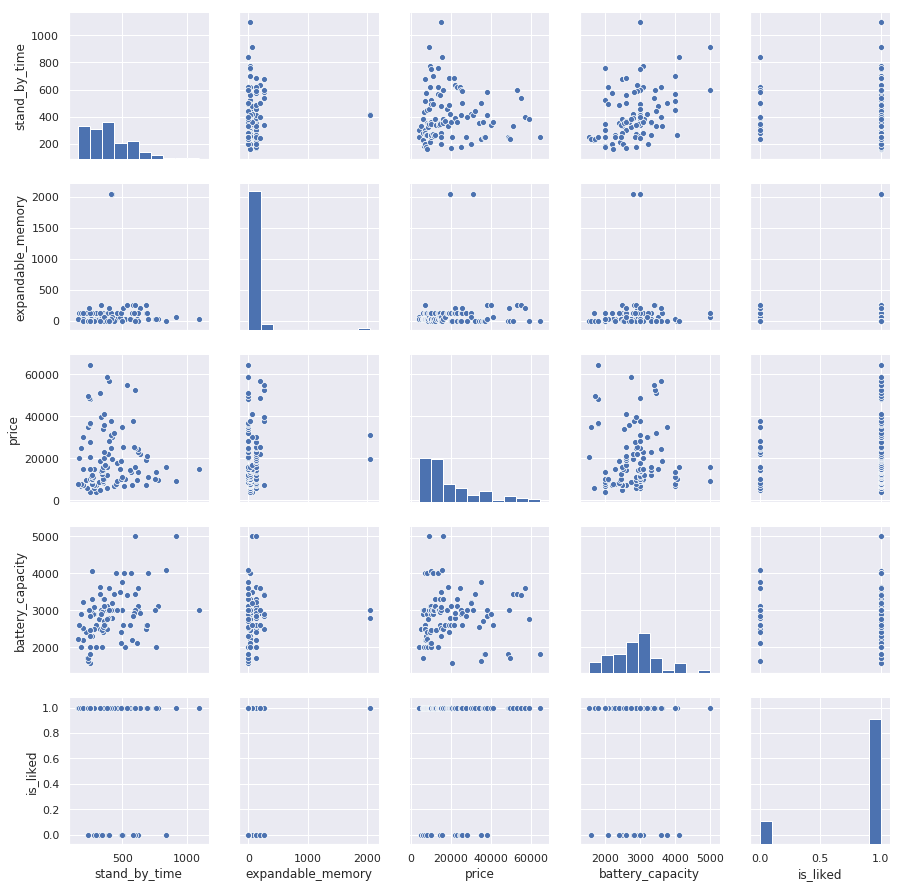

In [51]:
ax = sns.pairplot(data_thin,diag_kind='hist')

In [0]:
ax.savefig('Pairplot1.png')

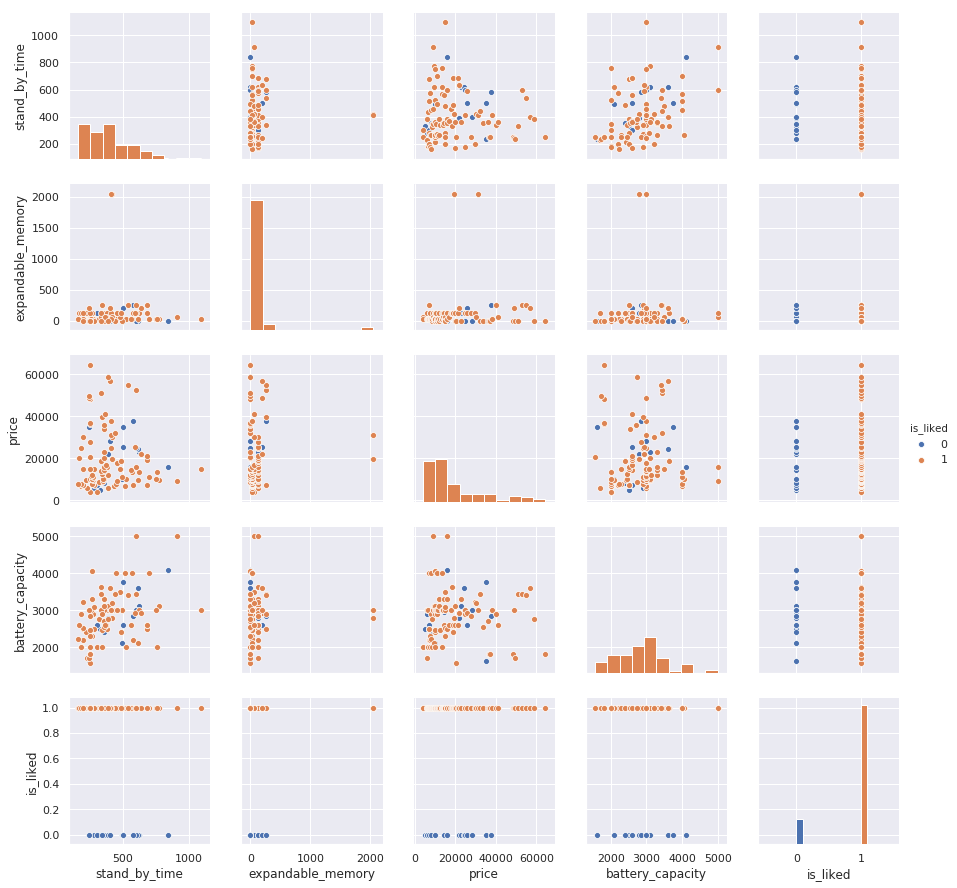

In [54]:
ax = sns.pairplot(data_thin,diag_kind='hist',hue='is_liked')

In [0]:
ax.savefig('pairplot2.png')

# Debugging

In [0]:
def factorial(x):
  if x==0:
    return 1
  return x*factorial(x-1)

In [60]:
import random
for i in range(10):
  import pdb; pdb.set_trace()
  x = random.random()
  factorial(x)

> <ipython-input-60-a7381c7c473d>(4)<module>()
-> x = random.random()
(Pdb) l
  1  	import random
  2  	for i in range(10):
  3  	  import pdb; pdb.set_trace()
  4  ->	  x = random.random()
  5  	  factorial(x)
[EOF]
(Pdb) n
> <ipython-input-60-a7381c7c473d>(5)<module>()
-> factorial(x)
(Pdb) s
--Call--
> <ipython-input-57-90222597d128>(1)factorial()
-> def factorial(x):
(Pdb) n
> <ipython-input-57-90222597d128>(2)factorial()
-> if x==0:
(Pdb) print(x)
0.18706759269825224
(Pdb) ?

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit 

BdbQuit: ignored

In [65]:
%xmode Verbose

Exception reporting mode: Verbose


In [66]:
for i in range(10):
  x = random.random()
  factorial(x)

RecursionError: ignored

In [0]:
def factorial_corrected(x):
  if not isinstance(x,int):
    return -1
  if x==0:
    return 1
  return x*factorial(x-1)

In [64]:
import random
for i in range(10):
  x = random.random()
  print(factorial_corrected(x))

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
